# Testing

# Notebook

In [113]:
import pandas as pd
import altair as alt
from matplotlib import pyplot as plt
from pathlib import Path
%matplotlib inline
%load_ext autoreload
%autoreload 2
import numpy as np

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [114]:
alt.renderers.enable('notebook')
DATA = Path('data')

In [115]:
df = pd.read_csv(DATA/'ae_data.csv')
df.head()

,id,seq,topWait,hospTime,hospCoord,hospUrlB5,hospUrlEn,hospUrlGb,pastHours,hospNameB5,hospNameEn,hospNameGb,hospTimeEn
0,QMH 21/2/2019 9:00am,HK-02,> 2,2019-02-21T09:00:09.29,POINT(114.131259 22.270695),http://www.ha.org.hk/visitor/ha_visitor_index....,http://www.ha.org.hk/visitor/ha_visitor_index....,http://www.ha.org.hk/visitor/ha_visitor_index....,3,瑪麗醫院,Queen Mary Hospital,玛丽医院,21/2/2019 9:00am
1,AHN 21/2/2019 10:00am,NT-01,> 1,2019-02-21T10:00:01.783,POINT(114.17472 22.458575),http://www.ha.org.hk/visitor/ha_visitor_index....,http://www.ha.org.hk/visitor/ha_visitor_index....,http://www.ha.org.hk/visitor/ha_visitor_index....,3,雅麗氏何妙齡那打素醫院,Alice Ho Miu Ling Nethersole Hospital,雅丽氏何妙龄那打素医院,21/2/2019 10:00am
2,QMH 21/2/2019 11:00am,HK-02,> 1,2019-02-21T11:00:11.893,POINT(114.131259 22.270695),http://www.ha.org.hk/visitor/ha_visitor_index....,http://www.ha.org.hk/visitor/ha_visitor_index....,http://www.ha.org.hk/visitor/ha_visitor_index....,3,瑪麗醫院,Queen Mary Hospital,玛丽医院,21/2/2019 11:00am
3,AHN 21/2/2019 12:00pm,NT-01,> 1,2019-02-21T12:00:02.256,POINT(114.17472 22.458575),http://www.ha.org.hk/visitor/ha_visitor_index....,http://www.ha.org.hk/visitor/ha_visitor_index....,http://www.ha.org.hk/visitor/ha_visitor_index....,3,雅麗氏何妙齡那打素醫院,Alice Ho Miu Ling Nethersole Hospital,雅丽氏何妙龄那打素医院,21/2/2019 12:00pm
4,PYN 21/2/2019 12:00pm,HK-01,> 3,2019-02-21T12:00:01.646,POINT(114.235707 22.269419),http://www.ha.org.hk/visitor/ha_visitor_index....,http://www.ha.org.hk/visitor/ha_visitor_index....,http://www.ha.org.hk/visitor/ha_visitor_index....,3,東區尤德夫人那打素醫院,Pamela Youde Nethersole Eastern Hospital,东区尤德夫人那打素医院,21/2/2019 12:00pm


In [116]:
x=df['hospCoord'].str.extract(r'\((.+)\)')[0].str.split().tolist()
x=pd.DataFrame(x, columns=['Long', 'Lat'])
x.head()

,Long,Lat
0,114.131259,22.270695
1,114.17472,22.458575
2,114.131259,22.270695
3,114.17472,22.458575
4,114.235707,22.269419


In [117]:
df = pd.concat([df, x],axis=1)

In [118]:
df['topWaitTime'] = df['topWait'].copy()
df['topWaitTime']  = df['topWaitTime'].str.replace('> ', '')
df['topWaitTime'][df['topWaitTime']== '< 1'] = 0.5
df['topWaitTime'] = df['topWaitTime'].fillna(0)
df['topWaitTime'] = df['topWaitTime'].astype(float)

C:\Users\lrcno\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [119]:
df['hospTime'] = pd.to_datetime(df['hospTime'])
df['hospTimeHour'] = df['hospTime'].dt.hour
df['hospTimeWeek'] = df['hospTime'].dt.week
df['hospTimeDay'] = df['hospTime'].dt.day
df['hospTimeYear'] = df['hospTime'].dt.year
df['hospTimeMonth'] = df['hospTime'].dt.month 
df['hospTimeWeekDay'] = df['hospTime'].dt.weekday + 1
df['hospTimeWeekDayName'] = df['hospTime'].dt.weekday_name
# df['hospTimeDate'] = df['hospTime'].dt.date

In [120]:
df= df[['hospTime','Long', 'Lat','hospTimeWeek','hospTimeWeekDay', 'hospNameEn','hospNameB5','topWaitTime','hospTimeMonth']]

# Map

In [121]:
# HKG Gov https://www.landsd.gov.hk/mapping/en/news/image/7p_itrf96_hk80_v1.pdf
import altair as alt
from vega_datasets import data

hk_map = 'https://raw.githubusercontent.com/ywng/d3-js-map-hong-kong/master/HKG_adm.json'
map = alt.topo_feature(hk_map, feature='HKG_adm1_1')
background = alt.Chart(map).mark_geoshape(
    fill='lightgray',
    stroke='white'
).properties(
    width=500,
    height=300
).project('mercator')
background.title = 'Hong Kong Hospitals'
background.save('hk_map_background.html')

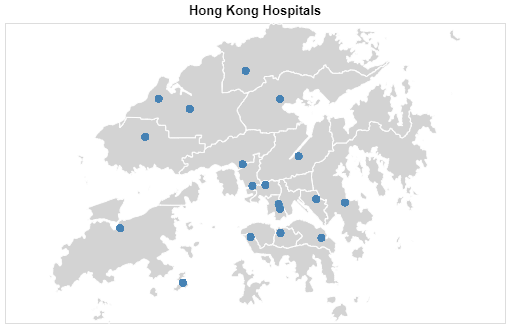

In [122]:
# airport positions on background
points = alt.Chart(df).mark_circle().encode(
    longitude='Long:Q',
    latitude='Lat:Q',
    size=alt.value(50),
    color=alt.value('steelblue'),
    tooltip=['hospNameB5', 'hospNameEn']
)

points.save('hk_map_points.html')
demo1 = background|points& background+points
demo1.save('demo1.html')

hk_map_hospital = background + points
hk_map_hospital


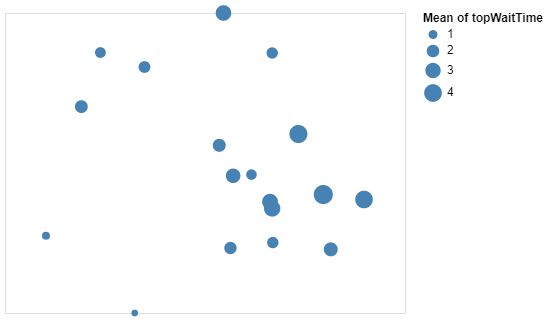

In [17]:
alt.Chart(df).mark_circle().encode(
    longitude='Long:Q',
    latitude='Lat:Q',
    size='mean(topWaitTime)',
    color=alt.value('steelblue')
).project('mercator')

# US 

In [28]:
import altair as alt
from vega_datasets import data

states = alt.topo_feature(data.us_10m.url, 'states')
capitals = data.us_state_capitals.url

In [29]:
capitals

'https://vega.github.io/vega-datasets/data/us-state-capitals.json'

In [ ]:
import altair as alt
from vega_datasets import data

counties = alt.topo_feature(data.us_10m.url, 'counties')
source = data.unemployment.url

alt.Chart(counties).mark_geoshape().project(
    type='albersUsa'
).properties(
    width=500,
    height=300
)

In [43]:
source

'https://vega.github.io/vega-datasets/data/unemployment.tsv'

In [42]:
counties

UrlData({
  format: TopoDataFormat({
    feature: 'counties',
    type: 'topojson'
  }),
  url: 'https://vega.github.io/vega-datasets/data/us-10m.json'
})

In [ ]:
.transform_lookup(
    lookup='id',
    from_=alt.LookupData(source, 'id', ['rate'])